## INF552 Homework 7

Student Name: Hsin-Yu, Chang (1160173733)

### 1. Generative Models for Text > Mimic the writing style of Bertrand Russell

#### (b) Download books by Bertrand Russell

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import numpy as np
import os

Using TensorFlow backend.


In [19]:
directory = '/Users/changhsinyu/Desktop/INF552Homework6/'
text = [f for f in os.listdir('/Users/changhsinyu/Desktop/INF552Homework6/') if '.txt' in f]
numtext = len(text)

def prepareCorpus(path):
    with open(path, 'r') as myfile:
        corpus = myfile.read()
    corpus = corpus.lower()
    asc2corpus = [ord(c) for c in corpus]
    return corpus, (np.array(asc2corpus).astype(float))/255

Using TensorFlow backend.


In [20]:
directory = '/Users/changhsinyu/Desktop/INF552Homework6/'
text = [f for f in os.listdir('/Users/changhsinyu/Desktop/INF552Homework6/') if '.txt' in f]
numtext = len(text)

In [21]:
text

['InquiryMeaningandTruth.txt',
 'pg2529.txt',
 '25447-0.txt',
 'HistoryOfWesternPhilosophy.txt',
 'AnalysisofMatter.txt',
 '37090-0.txt',
 'pg5827.txt']

__>__ Using 7 books witten by Bertrand Russell to create Corpus.

#### (c) LSTM: Train an LSTM to mimic Russell’s style and thoughts

#### i. Corpus of Russell’s writings

In [23]:
def prepareCorpus(path):
    with open(path, 'r') as myfile:
        corpus = myfile.read()
    corpus = corpus.lower()
    asc2corpus = [ord(c) for c in corpus]
    return corpus, (np.array(asc2corpus).astype(float))/255

corpus0, asc2corpus0 = prepareCorpus(directory+text[0])
corpus1, asc2corpus1 = prepareCorpus(directory+text[1])
corpus2, asc2corpus2 = prepareCorpus(directory+text[2])
corpus3, asc2corpus3 = prepareCorpus(directory+text[3])
corpus4, asc2corpus4 = prepareCorpus(directory+text[4])
corpus5, asc2corpus5 = prepareCorpus(directory+text[5])
corpus6, asc2corpus6 = prepareCorpus(directory+text[6])
corpusFull = [corpus0, corpus1, corpus2, corpus3, corpus4, corpus5, corpus6]

In [32]:
corpus0[:1000]

'this book has developed gradually over a period of years culminating in a series of academic appointments. in 1938 treated part of the subject in a course of lectures on "language and fact" at the university of oxford. these lectures formed the basis for seminar courses at the university of chicago in 1938-9 and the university of california at los angeles in 1939-40. the discussions at the two seminars did much to widen my conception of the problems involved and to diminish the emphasis wldch i originajly placed on the linguistic aspects of the subject. i have to express a collective obligation to those both professors and pupils, who, by detailed friendly criticism j > helped (i hope) in the avoidance of errors and fallacies. more especially at chicago, where the seminar was often attended by professors camap and morris, and where some of the graduate students showed great philosophic ability, the discussions were models of fruitful argumentative cooperation. mr. norman dalkey, who a

#### ii. Character-level Representation

In [33]:
chars = []
for n in corpusFull:
    #print(len(list(set(n))))
    chars.extend(list(set(set(n))))

chars = sorted(list(set(chars)))
charDict = dict((c, i) for i, c in enumerate(chars))
intDict = dict((i, c) for i, c in enumerate(chars))

#### iii./iv. Prepare input and output for LSTM with window size = 100

In [34]:
#iv.
def windowCorpus(corpus, windowsize):
    inPut = []
    outPut = []
    for w in range(0, len(corpus)-windowsize+1, 1):
        seqIn = corpus[w:w+windowsize-1]
        #print(seqIn)
        seqOut = corpus[w+windowsize-1]
        #print(seqOut)
        inPut.append([charDict[c] for c in seqIn])
        outPut.append(charDict[seqOut])

    return inPut, outPut

In [35]:
for n in corpusFull:
    windowsize = 100
    inPut = []
    outPut = []
    inPuttemp, outPuttemp = windowCorpus(n, windowsize)
    inPut.extend(inPuttemp)
    outPut.extend(outPuttemp)

In [40]:
inPutt = np.reshape(inPut, (len(inPut), windowsize-1, 1))
print(inPutt.shape)

# normalize
inPutt = inPutt / float(len(chars))
#inPutt[0]
#outPutt[0]

(245653, 99, 1)


#### v. One-hot encoding for output

In [ ]:
# one hot spot
outPutt = np_utils.to_categorical(outPut)

#### vi./vii./viii./ix./x. LSTM Model Contruction with epochs=60 and batch_size=64

In [41]:
# define the LSTM model
LSTMmodel = Sequential()
LSTMmodel.add(LSTM(256, input_shape=(inPutt.shape[1], inPutt.shape[2])))
LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(Dense(outPutt.shape[1], activation='softmax'))
print(LSTMmodel.summary())

LSTMmodel.compile(loss='categorical_crossentropy', optimizer='adam')

filepath="/Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 89)                22873     
Total params: 287,065
Trainable params: 287,065
Non-trainable params: 0
_________________________________________________________________
None


##### Doing first 30 epochs

In [46]:
LSTMmodel.fit(inPutt, outPutt, epochs=30, batch_size=64, callbacks=callbacks_list)

Epoch 1/30
245653/245653 [==============================] - 2167s 9ms/step - loss: 2.7356

Epoch 00001: loss improved from 2.89577 to 2.73563, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-01-2.7356-bigger.hdf5
Epoch 2/30
245653/245653 [==============================] - 2067s 8ms/step - loss: 2.6546

Epoch 00002: loss improved from 2.73563 to 2.65459, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-02-2.6546-bigger.hdf5
Epoch 3/30
245653/245653 [==============================] - 2001s 8ms/step - loss: 2.5783

Epoch 00003: loss improved from 2.65459 to 2.57834, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-03-2.5783-bigger.hdf5
Epoch 4/30
245653/245653 [==============================] - 2002s 8ms/step - loss: 2.5021

Epoch 00004: loss improved from 2.57834 to 2.50208, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvemen

#### xi. Text generation by LSTM

In [47]:
init = 'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object.'

pattern = [charDict[c] for c in init[-99:].lower()]

for i in range(1000):
    seq = np.reshape(pattern, (1, len(pattern), 1))
    seq = seq / float(len(chars))
    charpredict = LSTMmodel.predict(seq, verbose=0)
    ind = np.argmax(charpredict)
    init+=intDict[ind]
    pattern.append(ind)
    pattern = pattern[1:len(pattern)]

print(init)


There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object. the sane aspomeatio siises of the sense-data which we can oever keoe in the sane poreibnios of the sane pejects of the sense-data which we can oever keoe in the sane poreibnios of the sane sense dnd to to ae pnoeibdd by a cercai to the renst- and that ie te sea the same os cessarn the sane semse- and that ie te see the sane tere an th the taale whll be ioren to the panticular things and then in the sane semetion th the rane pejects of the sane sense dnd tote of the sane semse- and thit pespic an a persicular toil as th the taale whll be soue that is is toue, in thi sans tian the sable is toue of the sane semse- and thit pespin ane toee th the rane pejects of the sane sense dnd tote of the sane semse- and thit pespic an a persicular toil as th the taale whll be soue that is is toue, in thi sans tian the sable is toue of the sane semse-

##### Doing more epochs

In [52]:
LSTMmodel1 = Sequential()
LSTMmodel1.add(LSTM(256, input_shape=(inPutt.shape[1], inPutt.shape[2])))
LSTMmodel1.add(Dropout(0.2))
LSTMmodel1.add(Dense(outPutt.shape[1], activation='softmax'))

filename = '/Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-30-1.8374-bigger.hdf5'
LSTMmodel1.load_weights(filename)

In [53]:
LSTMmodel1.compile(loss='categorical_crossentropy', optimizer='adam')

filepath="/Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement1-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [54]:
LSTMmodel1.fit(inPutt, outPutt, epochs=30, batch_size=64, callbacks=callbacks_list)

Epoch 1/30
245653/245653 [==============================] - 2188s 9ms/step - loss: 1.8287

Epoch 00001: loss improved from inf to 1.82872, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement1-01-1.8287-bigger.hdf5
Epoch 2/30
245653/245653 [==============================] - 2140s 9ms/step - loss: 1.8204

Epoch 00002: loss improved from 1.82872 to 1.82042, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement1-02-1.8204-bigger.hdf5
Epoch 3/30
245653/245653 [==============================] - 2075s 8ms/step - loss: 1.8150

Epoch 00003: loss improved from 1.82042 to 1.81503, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement1-03-1.8150-bigger.hdf5
Epoch 4/30
245653/245653 [==============================] - 2194s 9ms/step - loss: 1.8043

Epoch 00004: loss improved from 1.81503 to 1.80435, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement

#### xi. Text generation by LSTM

In [55]:
init = 'There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object.'

pattern = [charDict[c] for c in init[-99:].lower()]

for i in range(1000):
	seq = np.reshape(pattern, (1, len(pattern), 1))
	seq = seq / float(len(chars))
	charpredict = LSTMmodel1.predict(seq, verbose=0)
	ind = np.argmax(charpredict)
	init+=intDict[ind]
	pattern.append(ind)
	pattern = pattern[1:len(pattern)]

print(init)

There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object. wh can see that the sense-data are teene and thet aanue the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve that the sense-data which we caliot aelieve tha

### 2. (Deep) CNNs for Image Colorization

#### (a) Downolad the CIFAR-10 dataset

In [1]:
import pandas
import numpy as np
import os


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#### (b) Extracting 'Bird' class

In [2]:
file = '/Users/changhsinyu/Desktop/INF552Homework6/cifar-10-batches-py/'
trainbatch = ['data_batch_'+str(i) for i in range(1, 6)]
testbatch = 'test_batch'

#train
ttrainlabel = []
ttraindata = []

for fp in trainbatch:
    batch = unpickle(file+fp)
    ttrainlabel.extend(batch[b'labels'])
    ttraindata.extend(batch[b'data'])

ttraindata = np.array(ttraindata)
birdindextr, = np.where(np.array(ttrainlabel)==2)
birdtrain = ttraindata[birdindextr]
birdtrain.shape

#test
tbatch = unpickle(file+testbatch)
testlabel = tbatch[b'labels']
testdata = batch[b'data']

birdindexte, = np.where(np.array(testlabel)==2)
birdtest = testdata[birdindexte]
birdtest.shape

bird = np.concatenate((birdtrain, birdtest))
bird.shape

(6000, 3072)

#### (c) Choose 80% of the pixels randomly

In [3]:
pct = 0.8
randomlen = int(32*32*6000*pct)
randomindex = np.random.choice(6000*32*32, randomlen)
randomM = [(ind//1024, [ind%1024, ind%1024+1024, ind%1024+2048]) for ind in randomindex]
randompixel = np.array([bird[i[0]][i[1]] for i in randomM])

#### (d) K-means on randomly chosen 80% of the pixels

In [39]:
cluscenter

array([[108, 107,  83],
       [156, 155, 137],
       [ 48,  48,  38],
       [208, 213, 212]], dtype=uint8)

In [4]:
from sklearn.cluster import KMeans
kmeansclusterer = KMeans(n_clusters=4, random_state=0).fit(randompixel) 
cluscenter = kmeansclusterer.cluster_centers_.astype(np.uint8())

In [7]:
def color2four(clusterer, originalimage): #originalimage = (1,3072)
    cluscenter = clusterer.cluster_centers_.astype(np.uint8())
    temp = originalimage.reshape(3,1024).T 
    colorclus = kmeansclusterer.predict(temp)

    if len(set(list(colorclus)))!=4:
        missingC = [c for c in range(4) if c not in list(set(list(colorclus)))]
        tp = np.append(colorclus, [missingC])
        colorclusdm = np.array(pandas.get_dummies(tp)) 
        colorclusdm = colorclusdm[:-len(missingC)]
    else:
        colorclusdm = np.array(pandas.get_dummies(colorclus)) 
    
    return [(cluscenter.T@(colorclusdm.T)).flatten().astype(np.uint8()), colorclusdm.flatten()]

#### (e) Grayscale Images

In [5]:
# The luminosity method
def rgb2gray(originalimage):
    conversion = np.array([0.2125, 0.7154, 0.0721])
    #return np.min((originalimage.reshape(3,32,32).T)@conversion, 255).astype(int)
    return ((originalimage.reshape(3,32,32).T)@conversion).flatten().astype(np.uint8())

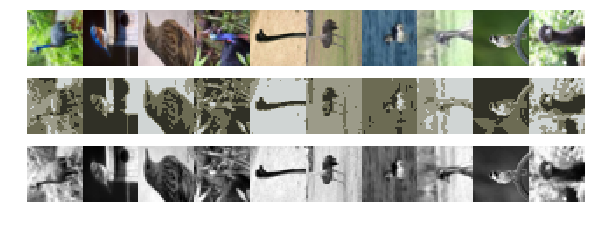

In [8]:
from matplotlib import pyplot
pyplot.figure(figsize=(10,15))

for i, littlebird in enumerate(bird[:10], start=1) :
    #original
    pyplot.subplot(3,10,i)
    pyplot.imshow(littlebird.reshape(3,32,32).T)
    pyplot.axis('off')
    
    birdptofour = color2four(kmeansclusterer, littlebird)
    pyplot.subplot(3,10,10+i)
    pyplot.imshow(birdptofour[0].reshape(3,32,32).T)
    pyplot.axis('off')
    
    pyplot.subplot(3,10,20+i)
    pyplot.imshow(rgb2gray(littlebird).reshape(32,32), cmap="gray")
    pyplot.axis('off')
    
#pyplot.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
pyplot.subplots_adjust(wspace=0, hspace=-0.9)
pyplot.show()    

Showing the first 10 birds in our dataset. First row shows original images with RGB color, second row draws images by using kmeans center colorization, and the last row is the grayscale of images.

#### f. Deep Convolutional Neural Network

In [140]:
fourcolorbird = []
fourcolordums = []

for littlebird in bird:
    fourcolor = color2four(kmeansclusterer, littlebird)
    fourcolorbird.append(fourcolor[0]) 
    fourcolordums.append(fourcolor[1]) # .reshape(1024,4)

fourcolorbird = np.array(fourcolorbird)
fourcolordums = np.array(fourcolordums)

train4colorbirddums = fourcolordums[:5000][:].reshape(5000,32,32,4)
test4colorbirddums = fourcolordums[5000:][:].reshape(1000,32,32,4)

In [10]:
train4colorbirddums.shape

(5000, 4096)

In [11]:
graybird = []

for littlebird in bird:
    graybird.append(rgb2gray(littlebird))

graybird = np.array(graybird)

traingraybird = graybird[:5000][:].reshape(5000,32,32,1)
testgraybird = graybird[5000:][:].reshape(1000,32,32,1)

In [12]:
traingraybird.shape

(5000, 32, 32, 1)

In [13]:
#preprocessing data
traingraybirdScale = traingraybird.astype('float32')
traingraybirdScale /= 255
testgraybirdScale = testgraybird.astype('float32')
testgraybirdScale /= 255

In [81]:
import tensorflow as tf
import tensorflow.keras.backend as k
from tensorflow.keras.layers import Activation
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose,Reshape,Permute,Conv1D 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [180]:
train4colorbirddums1 = fourcolordums[:5000][:]
test4colorbirddums1 = fourcolordums[5000:][:]

In [181]:
def NNetwork():
    NNmodel = Sequential()
    
    #Convolutional
    NNmodel.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', input_shape=(32,32,1), activation='relu'))
    NNmodel.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    NNmodel.add(MaxPooling2D(pool_size=(2, 2)))
    NNmodel.add(Dropout(0.25))
    NNmodel.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    NNmodel.add(MaxPooling2D(pool_size=(2, 2)))    
    NNmodel.add(Dropout(0.25))
    #MLP
    NNmodel.add(Flatten())
    NNmodel.add(Dense(8192, activation='relu'))
    NNmodel.add(Dense(4096, activation='relu'))
    NNmodel.add(Activation('softmax'))
    return NNmodel

In [184]:
BirdModel = NNetwork()

In [185]:
print(BirdModel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 32, 32, 64)        1664      
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 8, 64)          0         
__________

In [186]:
filepath="/Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [187]:
BirdModel.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

BirdTrain = BirdModel.fit(x = traingraybird, 
                            y = train4colorbirddums1, validation_split=0.2, 
                            epochs = 5, batch_size=300, verbose=1, callbacks=callbacks_list)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 131s 33ms/step - loss: 4.0296 - acc: 0.7499 - val_loss: 4.0305 - val_acc: 0.7499

Epoch 00001: loss improved from inf to 4.02959, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-01-4.0296-bigger.hdf5
Epoch 2/5
4000/4000 [==============================] - 116s 29ms/step - loss: 4.0309 - acc: 0.7499 - val_loss: 4.0305 - val_acc: 0.7499

Epoch 00002: loss did not improve from 4.02959
Epoch 3/5
4000/4000 [==============================] - 114s 29ms/step - loss: 4.0309 - acc: 0.7499 - val_loss: 4.0305 - val_acc: 0.7499

Epoch 00003: loss did not improve from 4.02959
Epoch 4/5
4000/4000 [==============================] - 115s 29ms/step - loss: 4.0309 - acc: 0.7499 - val_loss: 4.0305 - val_acc: 0.7499

Epoch 00004: loss did not improve from 4.02959
Epoch 5/5
4000/4000 [==============================] - 123s 31ms/step - loss: 4.0309 - acc: 0.749

In [142]:
def NNetwork():
    NNmodel = Sequential()
    
    #Convolutional
    NNmodel.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=(32,32,1), activation='relu'))
    NNmodel.add(Dropout(0.25))
    NNmodel.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    NNmodel.add(MaxPooling2D(pool_size=(2, 2)))    
    NNmodel.add(Dropout(0.25))
    
    # #MLP
    NNmodel.add(Flatten())
    NNmodel.add(Dense(10000, activation='relu'))
    NNmodel.add(Dense(6000, activation='relu'))
    NNmodel.add(Dense(4096, activation='relu'))
    NNmodel.add(Reshape((32,32,4)))
    NNmodel.add(Activation('softmax'))

    return NNmodel

In [175]:
BirdModel = NNetwork()

In [176]:
print(BirdModel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 32, 32, 32)        832       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 32, 32, 64)        51264     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_53 (Dense)             (None, 10000)             163850000 
__________

In [178]:
filepath="/Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [179]:
BirdModel.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

BirdTrain = BirdModel.fit(x = traingraybird, 
                          y = train4colorbirddums, validation_split=0.2, 
                          epochs = 5, batch_size=300, verbose=1, callbacks=callbacks_list)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 242s 60ms/step - loss: 1.3778 - acc: 0.3301 - val_loss: 1.3762 - val_acc: 0.3372

Epoch 00001: loss improved from inf to 1.37780, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-01-1.3778-bigger.hdf5
Epoch 2/5
4000/4000 [==============================] - 199s 50ms/step - loss: 1.3749 - acc: 0.3334 - val_loss: 1.3741 - val_acc: 0.3394

Epoch 00002: loss improved from 1.37780 to 1.37489, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-02-1.3749-bigger.hdf5
Epoch 3/5
4000/4000 [==============================] - 192s 48ms/step - loss: 1.3744 - acc: 0.3336 - val_loss: 1.3734 - val_acc: 0.3387

Epoch 00003: loss improved from 1.37489 to 1.37437, saving model to /Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-03-1.3744-bigger.hdf5
Epoch 4/5
4000/4000 [==============

OSError: Can't prepare for writing data (file write failed: time = Wed Nov 28 20:06:02 2018
, filename = '/Users/changhsinyu/Desktop/INF552Homework6/LSTMweights/weights-improvement-bird-05-1.3737-bigger.hdf5', file descriptor = 72, errno = 28, error message = 'No space left on device', buf = 0x218aaa6000, total write size = 655360000, bytes this sub-write = 655360000, bytes actually written = 18446744073709551615, offset = 994199328)